<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Spring-Mass-Damper-System-the-ES103-Way" data-toc-modified-id="A-Spring-Mass-Damper-System-the-ES103-Way-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Spring-Mass-Damper System the ES103 Way</a></span></li></ul></div>

# From Dynamic Modeling in ES103 to Lagrangian Mechanics

This notebook is designed to provide a "bridge" from the energy-based, lumped-parameter dynamic modeling tools [you learned in ES103](https://alexanderallenbrown.github.io/ES103_SP23_Students/) to ["Lagrange's Method"](https://scholar.harvard.edu/files/david-morin/files/cmchap6.pdf) for building dynamic models of *mechanical* systems of masses, dampers, springs, and power transucers. Lagrange's method is primarily used for purely mechanical systems, and its use is very common in certain corners of robotics and vehicle dynamics. As we will see, it has a lot of utility when the motion of a complex system is written in "non-Newtonian" coordinates (coordinates for which Newton's 2nd law cannot be directly applied... when a coordinate system's origin is accelerating).

## A Spring-Mass-Damper System the ES103 Way

Consider the following spring-mass-damper system, already scoped appropriately to include just three elements:
* a mass $m_1$ that translates with velocity $v_1$ and [stores kinetic energy](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#First-Law-Assumptions-for-Common-System-Elements)
* an idealized translational damper $b_1$ that [dissipates energy](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#First-Law-Assumptions-for-Common-System-Elements).
* an idealized translational spring $K_1$ that [stores potential energy](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#Mechanical-Springs).

In addition, there is an input force from an idealized "infinite-power source" that provides a known force $F_i$ to the system, regardless of how much power that requires (i.e. regardless of how large the velocity $v_1$ might be). 

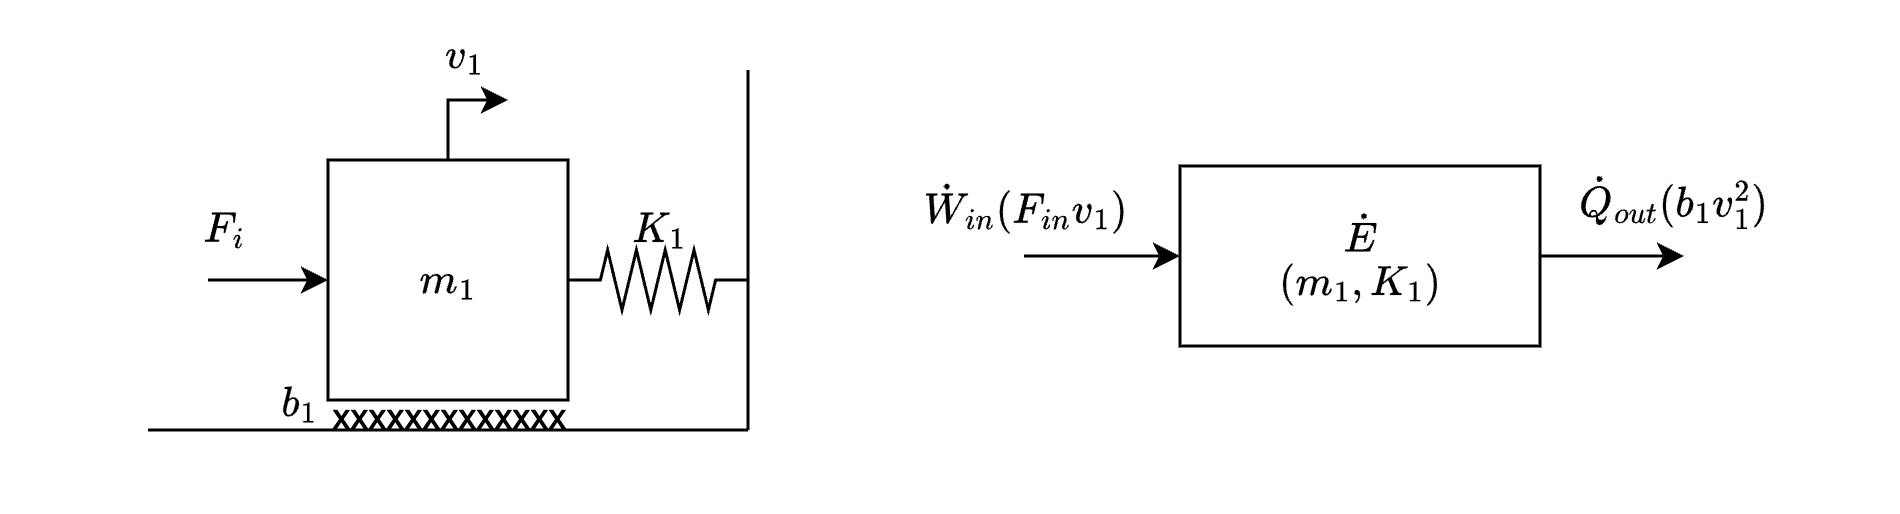

In ES103, you learned how to represent this system as an [equivalent generalized circuit](https://alexanderallenbrown.github.io/ES103_SP23_Students/ES103_Summary_Resource/ES103_Summary_Resource.html#Generalized-Equivalent-Circuits), which for this system, might look like the following.

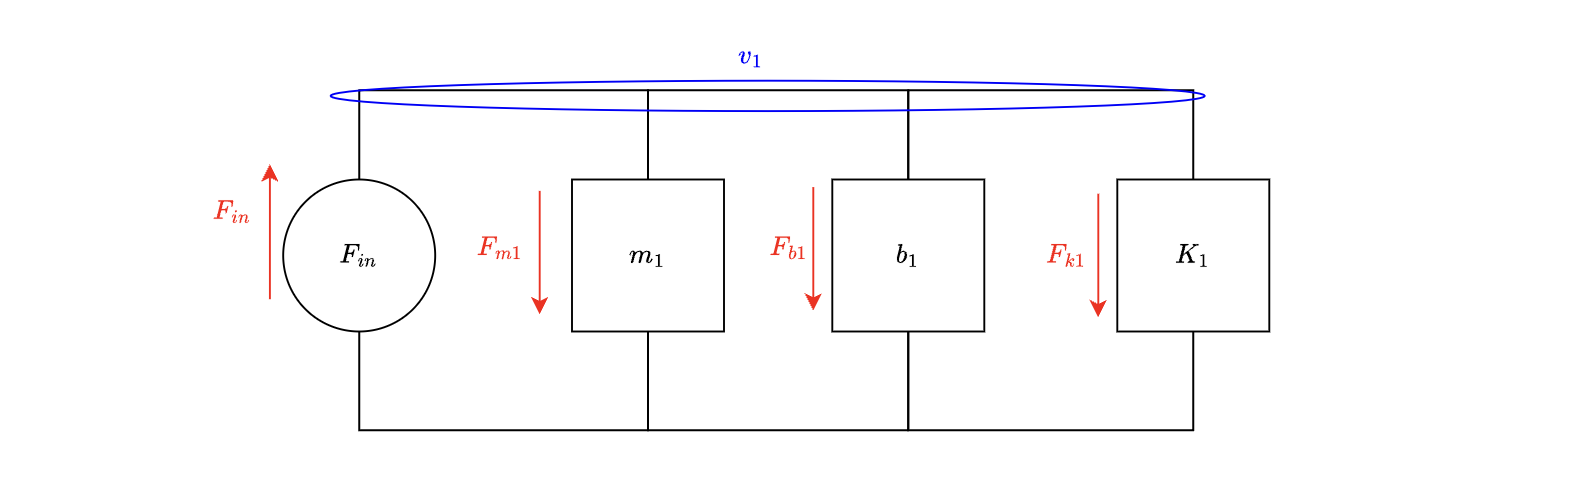

This equivalent circuit has one node and four "branches" including the input. Writing out the element, loop, and node equations for this system yields:

**Element Equations**
\begin{equation}
\dot{F}_{k1} = K_1v_1
\end{equation}
\begin{equation}
{F}_{b1} = b_1v_1
\end{equation}
\begin{equation}
{F}_{m1} = m_1\dot{v}_1
\end{equation}
**Node Equations**
\begin{equation}
\dot{F}_{in} = F_{m1}+F_{b1}+F_{k1}
\end{equation}

Combining equations (1) - (4) and defining $x_1 = \frac{F_{k1}}{K_1}$ (Hooke's Law) as our dependent variable of interest, or "system output," We get our final model:

\begin{equation}
m_1 \ddot{x}_1 + b_1\dot{x}_1 + K_1 x_1 = F_{in} 
\end{equation}

It is second-order, which makes sense since the system has two independent energy-storing elements, and the units of all terms in the above equation are Newtons, so the system passes our checks for internal validity.

# A Spring-Mass-Damper System Model the "Lazy way."

What if I told you that at least for *this* system, there was a way to use the First Law to get a model for our spring-mass-damper system in *two easy steps?* Well, there is... but there's a catch. This method **does not work for all types systems (including mixed systems) and/or all coordinate definitions**, which is why we learned the equivalent circuit approach in ES103. Anyway, let's try it out to see how it works. The disciplined process for this method is:

1. Write the time-derivative of the First Law for the *total energy* in our system (i.e. the First Law in "power form") using your overall energetic diagram for the system.
2. Cancel any "extra" variables

This should look suspiciously like the method we learned in ES103 for building models of simple systems before introducing equivalent circuits. For the spring-mass-damper system, The total energy **inside the system boundary** can be written as the sum of the energy in the Spring, or $E_{K1}=\frac{1}{2K_1}F_{k1}^2$, and the energy in the mass, or $E_{m1}=\frac{1}{2}m_1 v_1^2$. This means that our First Law's time derivative, according to our energetic diagram above, is:

\begin{equation}
\dot{E}_{sys} = \dot{E}_{k1}+\dot{E}_{m1} = \dot{W}_{in}-\dot{Q}_{out}
\end{equation}

Substituting in what we know 

